In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#linear algebra
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets

#miscellaneous
import warnings
warnings.filterwarnings("ignore")

**About Dataset**:
This data set consists of Placement data of students in a XYZ campus. It
includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [8]:
#Importing the dataset
data = pd.read_csv('placement.csv')

In [9]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


The training-set has 216 examples and 15 features. 6 of the features are floats, 8 are objects and 1 is integer. We have listed the features with a short description:
<table>
    <tr>
        <th>SL No.</th>
        <th>Attributes</th>
        <th>Serial Number</th>
    </tr>
    <tr>
        <th>1</th>
        <td>gender</td>
        <td>Gender- Male='M', Female='F'</td>
    </tr>
    <tr>
        <th>2</th>
        <td>ssc_p</td>
        <td>Secondary Education percentage- 10th Grade</td>
    </tr>
    <tr>
        <th>3</th>
        <td>ssc_b</td>
        <td>TBoard of Education- Central/ Others</td>
    </tr>
    <tr>
        <th>4</th>
        <td>hsc_p</td>
        <td>Higher Secondary Education percentage- 12th Grade</td>
    </tr>     
    <tr>
        <th>5</th>
        <td>hsc_b</td>
        <td>Board of Education- Central/ Others</td>
    </tr>   
    <tr>
        <th>6</th>
        <td>hsc_s</td>
        <td>Specialization in Higher Secondary Education</td>
    </tr>      
    <tr>
        <th>7</th>
        <td>degree_p</td>
        <td>Degree Percentage</td>
    </tr>
    <tr>
        <th>8</th>
        <td>degree_t</td>
        <td>Under Graduation(Degree type)- Field of degree education</td>
    </tr>
    <tr>
        <th>9</th>
        <td>workex</td>
        <td>Work Experience </td>
    </tr>    
     <tr>
         <th>10</th>
        <td>etest_p</td>
        <td>Employability test percentage ( conducted by college)</td>
    </tr>
    <tr>
        <th>11</th>
        <td>specialisation</td>
        <td>Post Graduation(MBA)- Specialization</td>
    </tr>   
    <tr>
        <th>12</th>
        <td>mba_p</td>
        <td>MBA percentage</td>
    </tr>  
     <tr>
         <th>13</th>
        <td>status</td>
        <td>Status of placement- Placed/Not placed</td>
    </tr>   
    <tr>
        <th>14</th>
        <td>salary</td>
        <td>Salary offered by corporate to candidates</td>
    </tr>   
</table>

In [11]:
#Basic statistical details
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
#Number of rows and columns(shape) of a dataset
data.shape

(215, 15)

**Data Pre-processing**

In [13]:
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We can see that salary contains 67 null values. In this case, missing values in the "salary" column indicate students who are not placed. Dropping salary and sl_no as it is not required

In [14]:
data = data.drop(columns=["sl_no", "salary"])

In [15]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

In [16]:
data = pd.DataFrame(data)

In [17]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [18]:
# List of columns to encode
columns_to_encode = ['gender', 'ssc_b', 'hsc_b', 'degree_t', 'specialisation', 'status' ]

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

print(data)

     gender  ssc_p  ssc_b  hsc_p  hsc_b     hsc_s  degree_p  degree_t workex  \
0         1  67.00      1  91.00      1  Commerce     58.00         2     No   
1         1  79.33      0  78.33      1   Science     77.48         2    Yes   
2         1  65.00      0  68.00      0      Arts     64.00         0     No   
3         1  56.00      0  52.00      0   Science     52.00         2     No   
4         1  85.80      0  73.60      0  Commerce     73.30         0     No   
..      ...    ...    ...    ...    ...       ...       ...       ...    ...   
210       1  80.60      1  82.00      1  Commerce     77.60         0     No   
211       1  58.00      1  60.00      1   Science     72.00         2     No   
212       1  67.00      1  67.00      1  Commerce     73.00         0    Yes   
213       0  74.00      1  66.00      1  Commerce     58.00         0     No   
214       1  62.00      0  58.00      1   Science     53.00         0     No   

     etest_p  specialisation  mba_p  st

{'gender': {'F': 0, 'M': 1}, 'ssc_b': {'Central': 0, 'Others': 1}, 'hsc_b': {'Central': 0, 'Others': 1}, 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2}, 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1}, 'status': {'Not Placed': 0, 'Placed': 1}}

**Data Visualization**

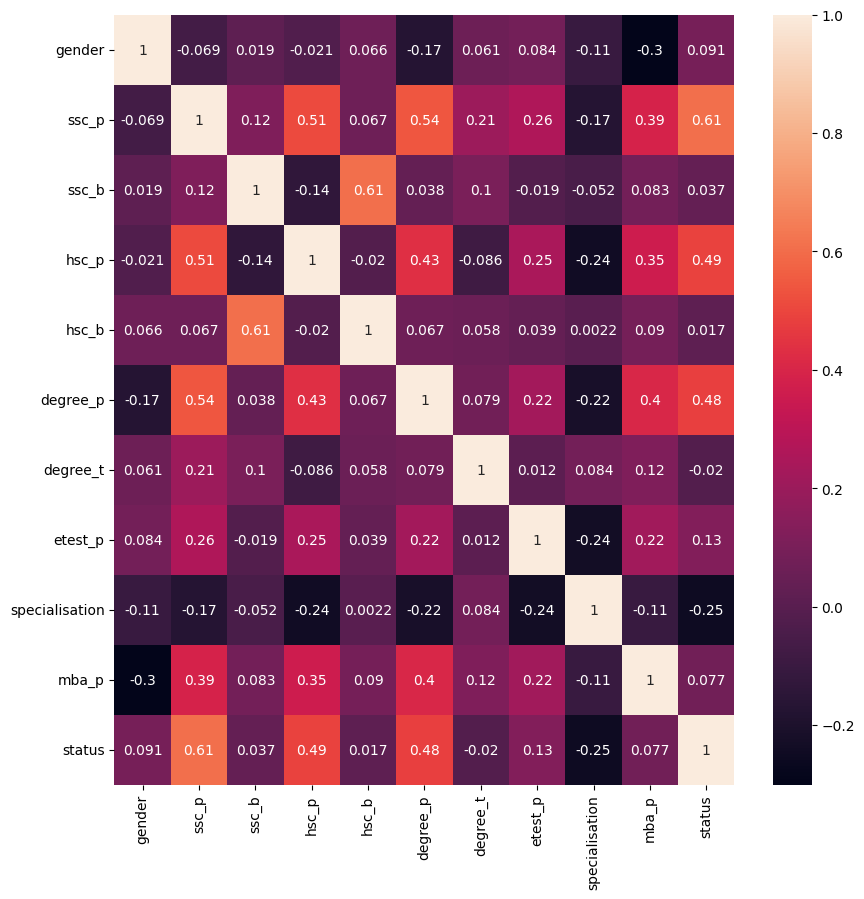

In [19]:
#hEAT MAP
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt=".2g")
plt.show()

The percentage of students that are placed is: 68.84%


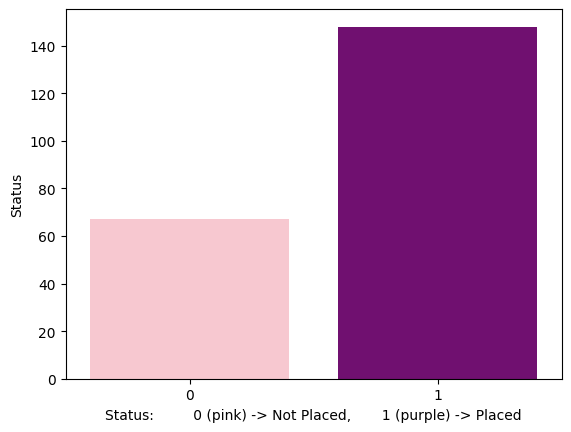

In [37]:
sns.countplot(x="status",data=data, palette={0:'pink', 1:'purple'})
plt.xlabel('Status:         0 (pink) -> Not Placed,       1 (purple) -> Placed')
plt.ylabel('Status')
porc = (len(data[data.status==1]) / len(data.status)) * 100
print('The percentage of students that are placed is: {:.2f}%'.format(porc))


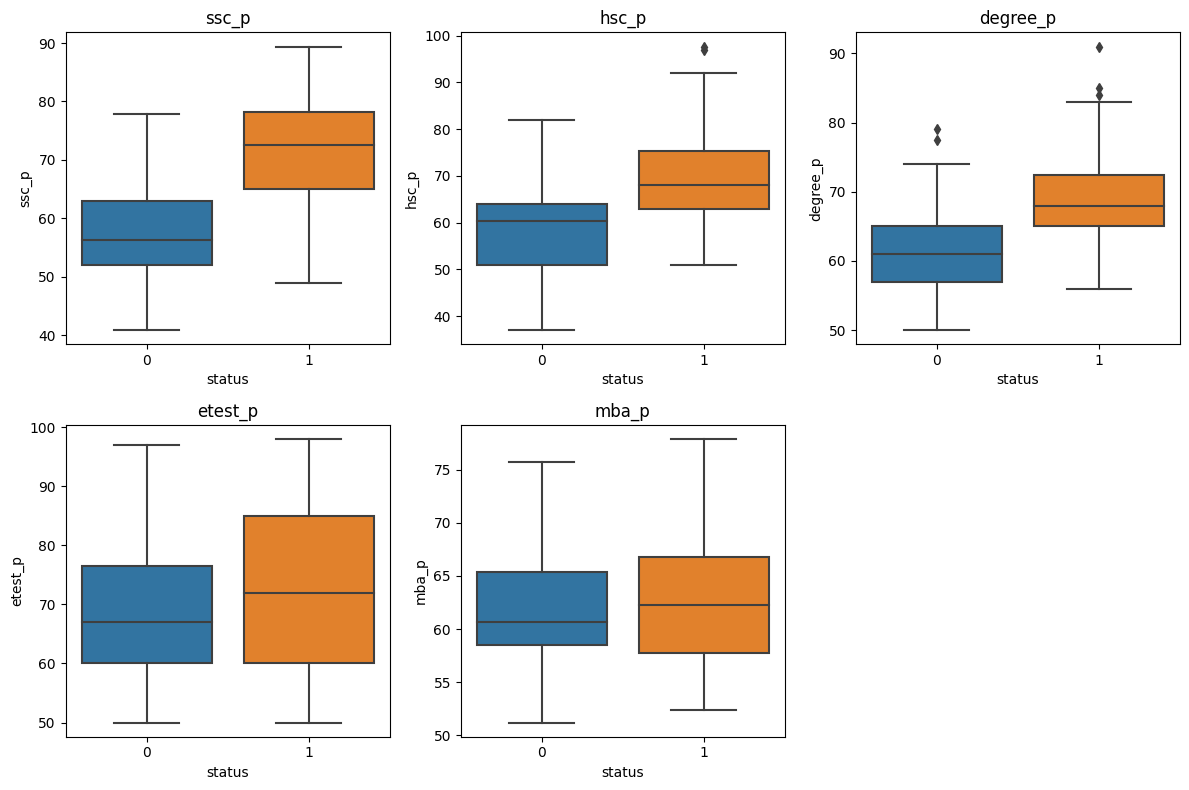

In [20]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# List of percentage attributes
percentage_attributes = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Loop through each attribute and create bar plots
for attr in percentage_attributes:
    plt.subplot(2, 3, percentage_attributes.index(attr) + 1)  # Create subplots
    sns.boxplot(x='status', y=attr, data=data)
    plt.title(attr)

plt.tight_layout()
plt.show()

In this code, we loop through each percentage attribute and create a box plot for each one, comparing the distribution of scores for placed and not placed students. The x-axis represents the placement status (Placed or Not Placed), and the y-axis represents the respective percentage attribute.

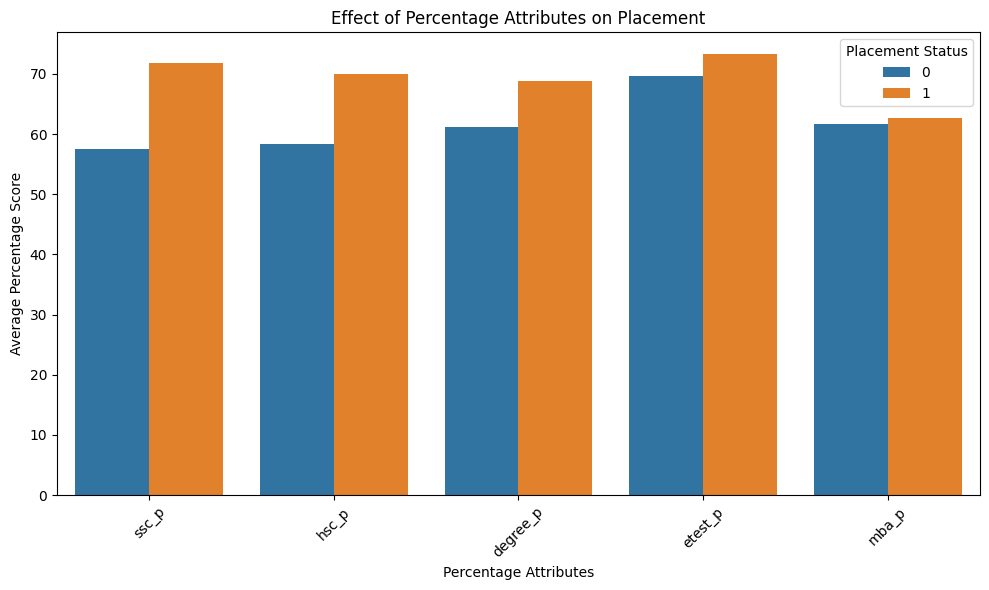

In [21]:
# Calculate the average percentage scores for placed and not placed students
average_scores = data.groupby('status')[percentage_attributes].mean().reset_index()

# Melt the data for easier plotting
melted_data = average_scores.melt(id_vars='status', var_name='attribute', value_name='average_score')

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='attribute', y='average_score', hue='status', data=melted_data)

# Customize the plot
plt.xticks(rotation=45)
plt.title('Effect of Percentage Attributes on Placement')
plt.xlabel('Percentage Attributes')
plt.ylabel('Average Percentage Score')
plt.legend(title='Placement Status')

plt.tight_layout()
plt.show()

In this code, we first calculate the average percentage scores for placed and not placed students using the groupby function. Then, we use the melt function to reshape the data for plotting. Finally, we create a bar plot with Seaborn where each attribute is represented by grouped bars, and the x-axis represents the percentage attributes, the y-axis represents the average percentage scores, and the colors represent placement status.

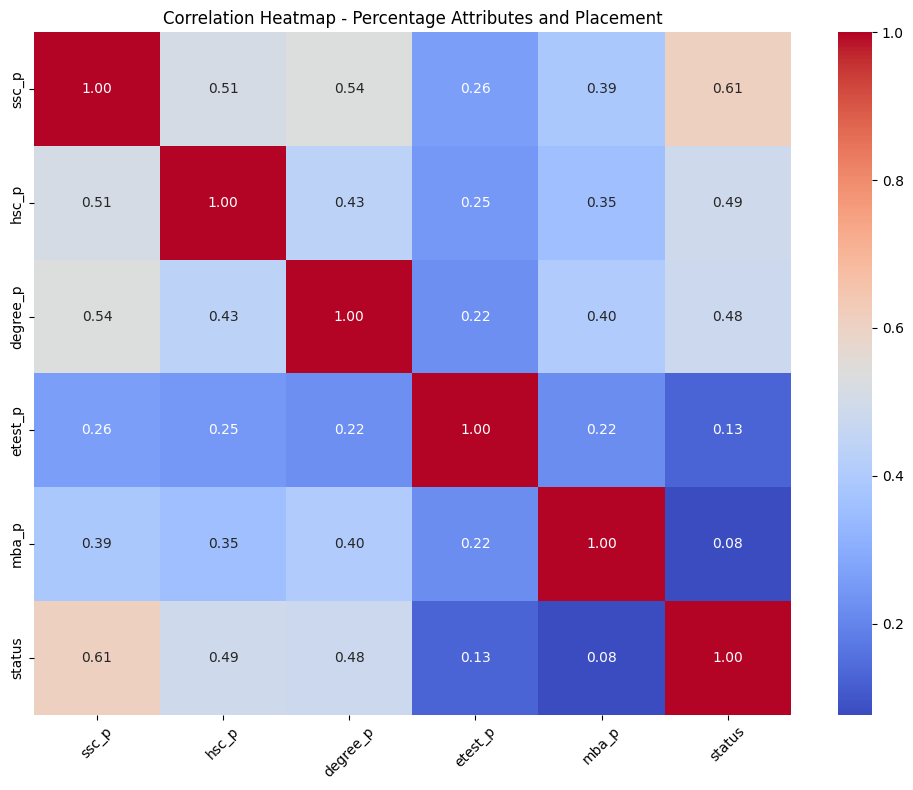

In [22]:
# Calculate the correlation matrix
correlation_matrix = data[percentage_attributes + ['status']].corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap - Percentage Attributes and Placement')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = data[percentage_attributes]  # Use the percentage attributes
y = data['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

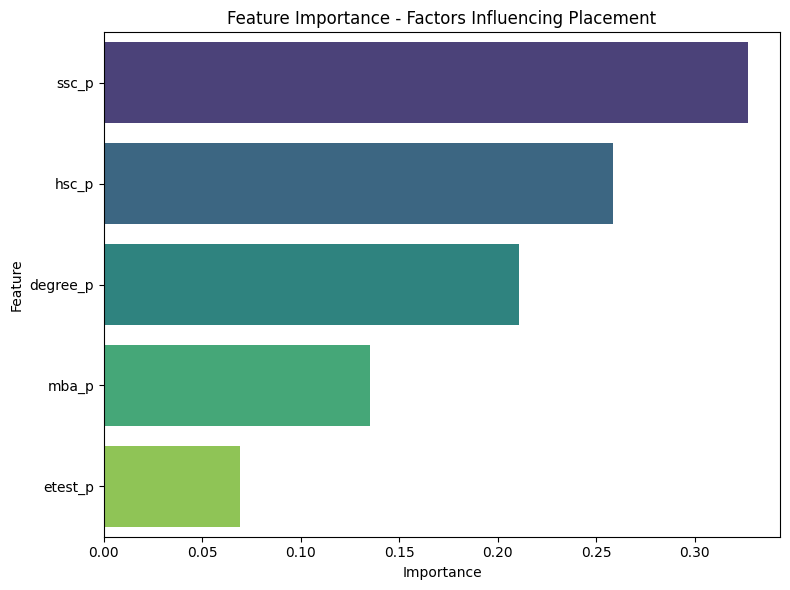

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and importance scores
importance_df = pd.DataFrame({'Feature': percentage_attributes, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Customize the plot
plt.title('Feature Importance - Factors Influencing Placement')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [29]:
import statsmodels.api as sm


# Split data into features and target
X = data[percentage_attributes]
y = data['status']  # Already encoded as 1 (Placed) and 0 (Not Placed)

# Add a constant term to the features matrix for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.297980
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  215
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            5
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                  0.5197
Time:                        18:11:20   Log-Likelihood:                -64.066
converged:                       True   LL-Null:                       -133.39
Covariance Type:            nonrobust   LLR p-value:                 3.482e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7627      3.443     -3.998      0.000     -20.510      -7.015
ssc_p          0.1802      0.

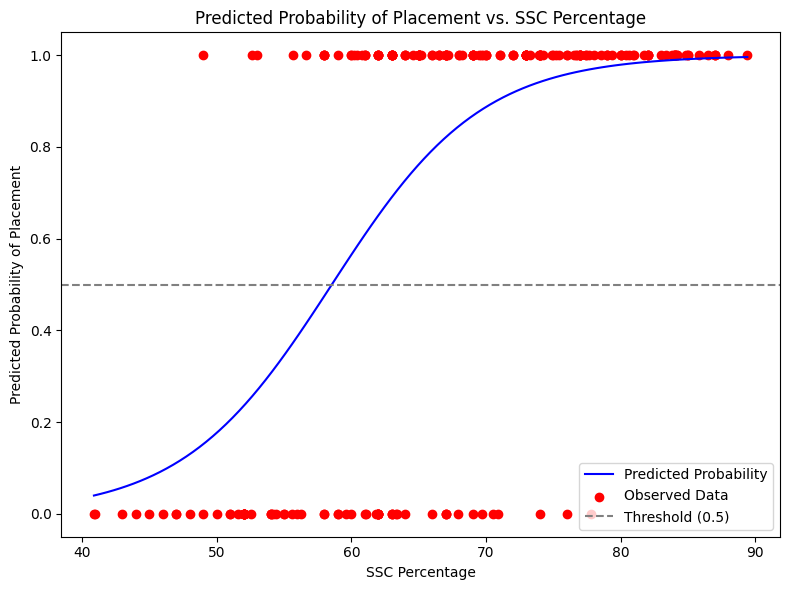

In [32]:
import numpy as np

# Create a DataFrame for visualization
visualization_df = pd.DataFrame({
    'const': 1,  # Add a constant term for the intercept
    'ssc_p': np.linspace(data['ssc_p'].min(), data['ssc_p'].max(), 100),
    'hsc_p': np.mean(data['hsc_p']),  # Use the mean value for other attributes
    'degree_p': np.mean(data['degree_p']),
    'etest_p': np.mean(data['etest_p']),
    'mba_p': np.mean(data['mba_p'])
})

# Predict probabilities for being placed
predicted_probabilities = model.predict(visualization_df)

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create the plot
plt.plot(visualization_df['ssc_p'], predicted_probabilities, color='blue', label='Predicted Probability')
plt.scatter(data['ssc_p'], y, color='red', label='Observed Data')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')

# Customize the plot
plt.title('Predicted Probability of Placement vs. SSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('Predicted Probability of Placement')
plt.legend()

plt.tight_layout()
plt.show()


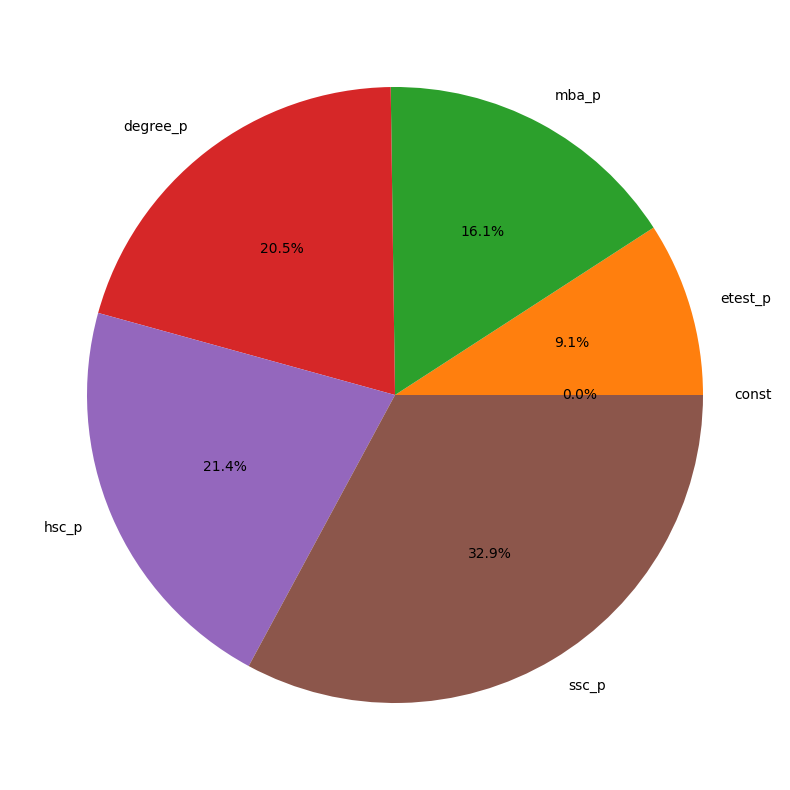

In [35]:
#Finding out the most important variables
clasification = RandomForestClassifier()
clasification.fit(X,y)

variables = X.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()